1. Сгенерируйте массив `A` из `N=1млн` случайных целых чисел на отрезке от 0 до 1000. Пусть `B[i] = A[i] + 100`. Посчитайте среднее значение массива `B`.

In [ ]:
import numpy as np
A = np.random.randint(0, 1000, 1000000)
B = A + 100
B.mean()

599.743279

2. Создайте таблицу 2млн строк и с 4 столбцами, заполненными случайными числами. Добавьте столбец `key`, которые содержит элементы из множества английских букв. Выберите из таблицы подмножество строк, для которых в столбце `key` указаны первые 5 английских букв.

In [ ]:
import pandas as pd
import string
df = pd.DataFrame((np.random.randint( 0,100 ,size=( 2000000 , 4 ))))
df['key'] = np.random.choice(list(string.ascii_lowercase), size = 2000000)
df.loc[df['key'].isin(list('abcde'))]

,0,1,2,3,key
30,95,91,76,33,e
31,45,89,21,54,e
35,66,24,14,94,c
49,93,1,9,73,a
51,82,14,4,16,c
...,...,...,...,...,...
1999972,69,27,81,64,e
1999973,58,60,6,94,d
1999986,64,53,10,67,b
1999988,29,6,3,55,b


## Лабораторная работа 3

In [ ]:
!pip install line_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.9/661.9 kB 17.6 MB/s eta 0:00:00


1. В файлах `recipes_sample.csv` и `reviews_sample.csv` (__ЛР 2__) находится информация об рецептах блюд и отзывах на эти рецепты соответственно. Загрузите данные из файлов в виде `pd.DataFrame` с названиями `recipes` и `reviews`. Обратите внимание на корректное считывание столбца(ов) с индексами. Приведите столбцы к нужным типам.

Реализуйте несколько вариантов функции подсчета среднего значения столбца `rating` из таблицы `reviews` для отзывов, оставленных в 2010 году.

A. С использованием метода `DataFrame.iterrows` исходной таблицы;

Б. С использованием метода `DataFrame.iterrows` таблицы, в которой сохранены только отзывы за 2010 год;

В. С использованием метода `Series.mean`.

Проверьте, что результаты работы всех написанных функций корректны и совпадают. Измерьте выполнения всех написанных функций.


In [ ]:
recipes = pd.read_csv('recipes_sample.csv')
reviews = pd.read_csv('reviews_sample.csv', index_col='Unnamed: 0', parse_dates=['date'])

In [ ]:
def A():
  sum = 0
  c = 0
  for i,row in reviews.iterrows():
    if pd.to_datetime('2011-01-01') > row['date'] >= pd.to_datetime('2010-01-01'):
      sum += row['rating']
      c += 1
  mean = sum/c
  print(mean)

A()

4.4544402182900615


In [ ]:
%%time
A()

4.4544402182900615
CPU times: user 32.7 s, sys: 97 ms, total: 32.8 s
Wall time: 36.1 s


In [ ]:
def B():
  summ = 0
  sorted_reviews = reviews[(reviews['date'] >= '2010-01-01') & (reviews['date'] < '2011-01-01')]
  for i, row in sorted_reviews.iterrows():
    summ += row['rating']
  print(len(sorted_reviews))
  print(summ/len(sorted_reviews))

B()

12094
4.4544402182900615


In [ ]:
%%time
B()

4.4544402182900615
CPU times: user 817 ms, sys: 4.71 ms, total: 822 ms
Wall time: 1.23 s


In [ ]:
def C():
  print(reviews[(reviews['date'] >= '2010-01-01') & (reviews['date'] < '2011-01-01')]['rating'].mean())

C()

4.4544402182900615


In [ ]:
%%time
C()

4.4544402182900615
CPU times: user 10.2 ms, sys: 2 µs, total: 10.2 ms
Wall time: 14.3 ms


2. Какая из созданных функций выполняется медленнее? Что наиболее сильно влияет на скорость выполнения? Для ответа использовать профайлер `line_profiler`. Сохраните результаты работы профайлера в отдельную текстовую ячейку и прокомментируйте результаты его работы.

(*). Сможете ли вы ускорить работу функции 1Б, отказавшись от использования метода `iterrows`, но не используя метод `mean`?

In [ ]:
%load_ext line_profiler

In [ ]:
def main_func():
  A()
  B()
  C()

In [ ]:
%lprun -f A -f B -f C main_func()

4.4544402182900615
4.4544402182900615
4.4544402182900615


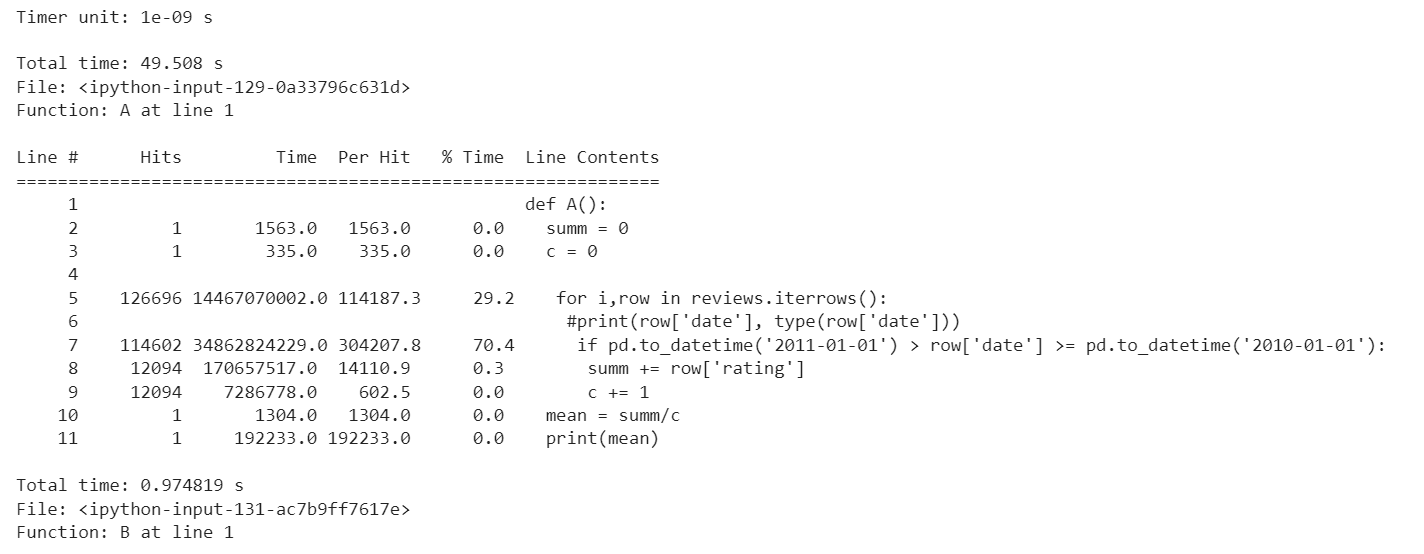


В функции В() наиболее времязатратной является строка for (86% времени)

Но мы проходим цикл 12094 раза, что меньше почти в 10 раз, чем в А()

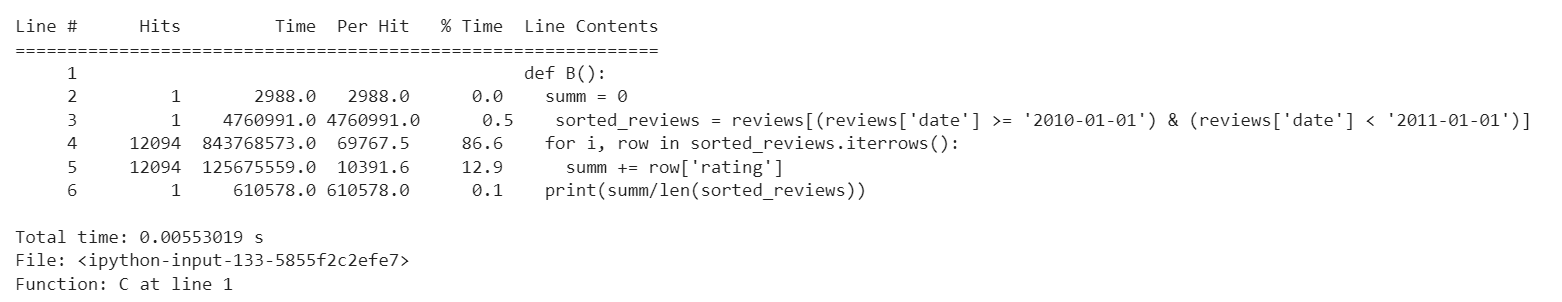

В функции С() одна строка, которая выполняется 1 раз и тратит 897.58 мс

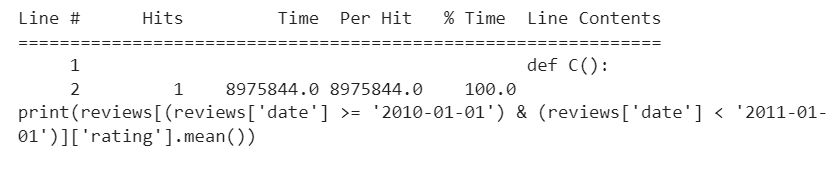

Функция А() выполняется дольше всего, из-за того что в цикле for мы аналиируем каждую строку таблицы (126696 раз проходимся в цикле)


На скорость выполнения кода наиболее сильно влияет количество выполнений строки



In [ ]:
def B():
  sorted_reviews = reviews[(reviews['date'] >= '2010-01-01') & (reviews['date'] < '2011-01-01')]
  print(sum(sorted_reviews['rating'].to_list())/len(sorted_reviews))
B()

4.4544402182900615


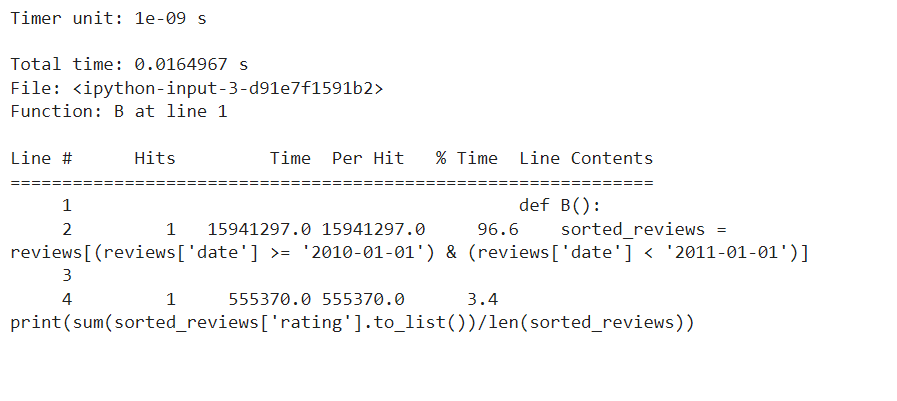

3. Вам предлагается воспользоваться функцией, которая собирает статистику о том, сколько отзывов содержат то или иное слово. Измерьте время выполнения этой функции. Сможете ли вы найти узкие места в коде, используя профайлер? Выпишите (словами), что в имеющемся коде реализовано неоптимально. Оптимизируйте функцию и добейтесь значительного (как минимум, на один порядок) прироста в скорости выполнения.

In [ ]:
def get_word_reviews_count(df):
    word_reviews = {}
    for _, row in df.dropna(subset=['review']).iterrows():
        recipe_id, review = row['recipe_id'], row['review']
        words = review.split(' ')
        for word in words:
            if word not in word_reviews:
                word_reviews[word] = []
            word_reviews[word].append(recipe_id)
    word_reviews_count = {}
    for _, row in df.dropna(subset=['review']).iterrows():
        review = row['review']
        words = review.split(' ')
        for word in words:
            word_reviews_count[word] = len(word_reviews[word])
    return word_reviews_count

In [ ]:
def get_word_reviews_count_1(df):
    word_reviews = {}
    for _, row in df.dropna(subset=['review']).iterrows():
        recipe_id, review = row['recipe_id'], row['review']
        words = review.split(' ')
        for word in words:
            if word not in word_reviews:
                word_reviews[word] = []
            word_reviews[word].append(recipe_id)
    word_reviews_count = {i:len(word_reviews[i]) for i in word_reviews}
    return word_reviews_count

In [ ]:
%lprun -f get_word_reviews_count_1 get_word_reviews_count_1(reviews)

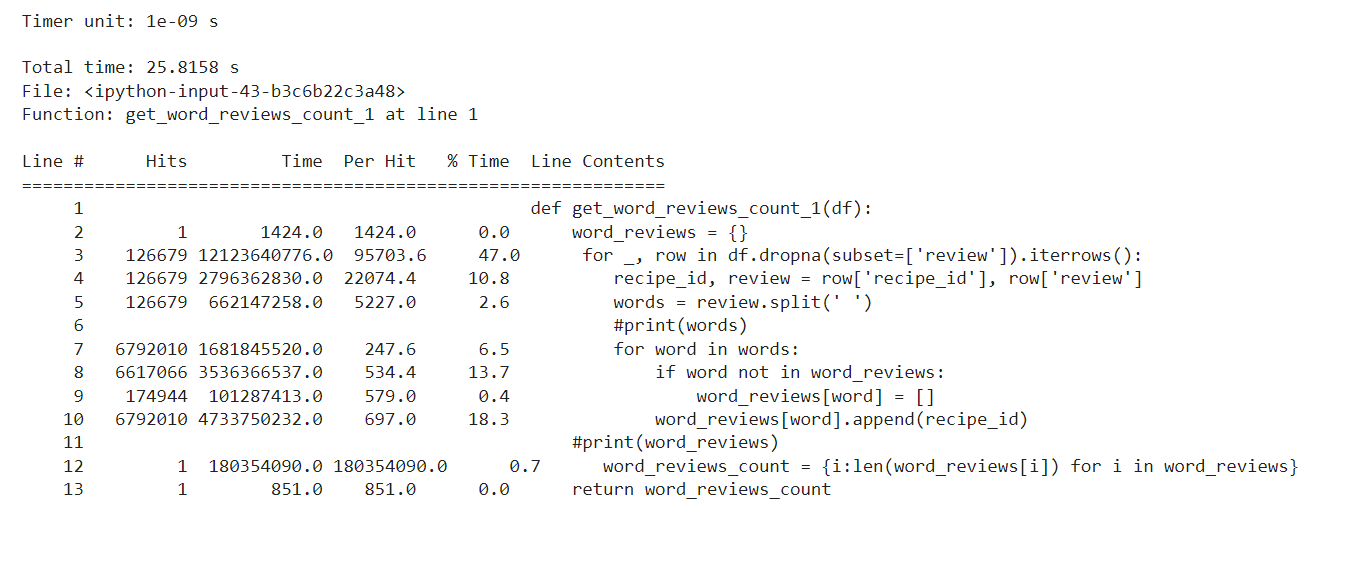

In [ ]:
%lprun -f get_word_reviews_count get_word_reviews_count(reviews)

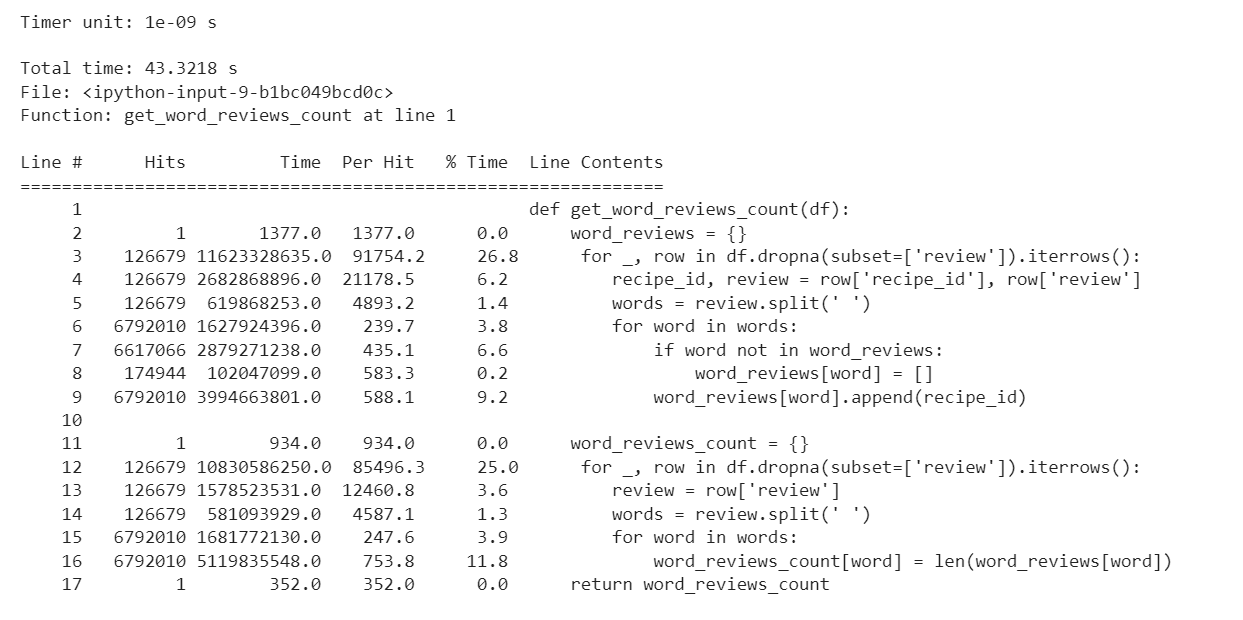

В данной функции два раза повторяется один и тот же цикл (строки 3 и 12), если убрать повторный перебор строк, то время сокращается почти в два раза

4. Напишите несколько версий функции `MAPE` (см. [MAPE](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)) для расчета среднего абсолютного процентного отклонения значения рейтинга отзыва на рецепт от среднего значения рейтинга по всем отзывам для этого рецепта. 
    1. Без использования векторизованных операций и методов массивов `numpy` и без использования `numba`
    2. Без использования векторизованных операций и методов массивов `numpy`, но с использованием `numba`
    3. С использованием векторизованных операций и методов массивов `numpy`, но без использования `numba`
    4. C использованием векторизованных операций и методов массивов `numpy` и `numba`
    
Измерьте время выполнения каждой из реализаций.

Замечание: удалите из выборки отзывы с нулевым рейтингом.


In [ ]:
reviews = reviews[reviews['rating'] != 0]

In [ ]:

%%time
def MAPE_1(id):
  list_rating = reviews[reviews['recipe_id'] == id]['rating'].to_list()
  n = len(list_rating)
  mean = sum(list_rating)/n
  summa = 0
  for actual in list_rating:
    summa += abs((actual - mean)/actual)
  return (1/n)*summa

MAPE_1(404716)


CPU times: user 1.56 ms, sys: 0 ns, total: 1.56 ms
Wall time: 1.57 ms


0.47407407407407404

In [ ]:
from numba import njit, jit
from numba.typed import List

In [ ]:

%%time
@njit
def MAPE_2(id, list_rating):
  n = len(list_rating)
  mean = sum(list_rating)/n
  summa = 0
  for actual in list_rating:
    summa += abs((actual - mean)/actual)
  return (1/n)*summa

reviews = reviews[reviews['rating'] != 0]
typed_list_rating = List()
[typed_list_rating.append(x) for x in reviews[reviews['recipe_id'] == 404716]['rating'].to_list()]
MAPE_2(404716, typed_list_rating)

CPU times: user 249 ms, sys: 4.01 ms, total: 253 ms
Wall time: 282 ms


0.47407407407407404

In [ ]:

%%time
def MAPE_3(id):
  actual = reviews[reviews['recipe_id'] == id]['rating'].to_numpy()
  mean = np.mean(actual)
  n = len(actual)
  return np.sum(np.abs((actual - mean)/actual))/n

v_MAPE_3 = np.vectorize(MAPE_3)
  
v_MAPE_3(404716)

CPU times: user 3.16 ms, sys: 0 ns, total: 3.16 ms
Wall time: 3.09 ms


array(0.47407407)